In [38]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.neighbors import NearestNeighbors
import numpy as np
from numpy.linalg import norm
import os
import pickle
import cv2
import matplotlib.pyplot as plt

In [17]:
model = ResNet50(weights='imagenet', include_top=False, pooling='max',input_shape=(224,224,3))
model.trainable = False


In [18]:
filepath = []
path = 'C./ML_Git_Project/ML/recomendation/myntradataset/images'

In [19]:
for file in os.listdir(path):
    filepath.append(os.path.join(path,file))

In [20]:
new_filepath = filepath[:10000]

In [21]:
feature_vector_load = np.array(pickle.load(open('C:/ML_Git_Project/ML/recomendation/feature_vector(1).pkl','rb')))
filepath_load = pickle.load(open('C:/ML_Git_Project/ML/recomendation/filepath(1).pkl','rb'))

In [22]:
def feature_extract(img,model):
    img = image.load_img(img, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x,verbose=0).flatten()
    normalized_features = features / norm(features)
    return normalized_features

In [23]:
#img from dataset

NN = NearestNeighbors(n_neighbors=7,algorithm='brute',metric='euclidean')
NN.fit(feature_vector_load)
img = 'C:/ML_Git_Project/ML/recomendation/myntradataset/images/10012.jpg'
processed_img = feature_extract(img,model)
distances,indices = NN.kneighbors([processed_img])

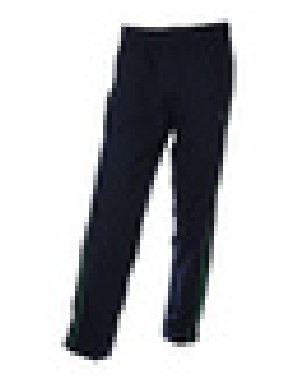

In [25]:
raw_img = cv2.imread(img)
raw_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB)
plt.imshow(raw_img)
plt.axis('off')
plt.show()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


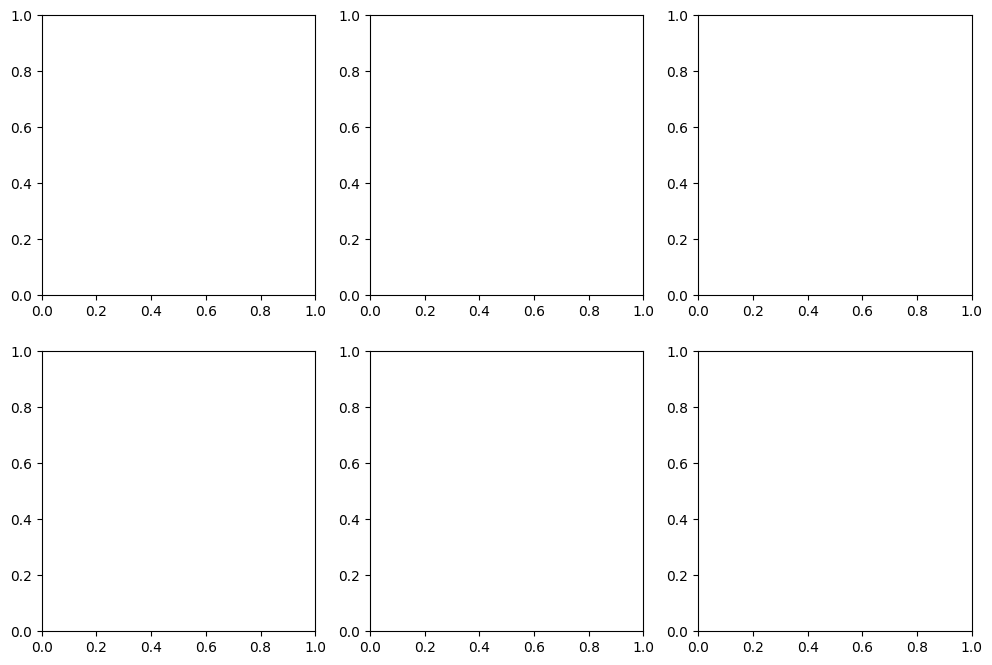

In [26]:
num_rows = 2
num_cols = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array to make it easier to iterate
axes = axes.ravel()

# Iterate over the indices and display images
for i, file in enumerate(indices[0][1:7]):
    temp_img = cv2.imread(filepath_load[file])
    image_rgb = cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB)

    # Display the image
    axes[i].imshow(image_rgb)
    axes[i].axis('off')

#Adjust layout
plt.tight_layout()
plt.show()